![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)
# **Counting Circles, Ellipses and Finding Waldo**

####**In this lesson we'll learn:**
1. Mini Project on Counting Circular Blobs
2. Mini Project on using Template Matching to find Waldo


In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

--2023-05-22 06:57:21--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.114
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip’

images.zip          100%[===================>]  28.22M  13.0MB/s    in 2.2s    

2023-05-22 06:57:24 (13.0 MB/s) - ‘images.zip’ saved [29586716/29586716]



In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size = 10):
    h, w = image.shape[:2]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()


## **Counting Circular Blobs**

![](https://i.stack.imgur.com/zYL2C.jpg)
![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/simpleblob.png)

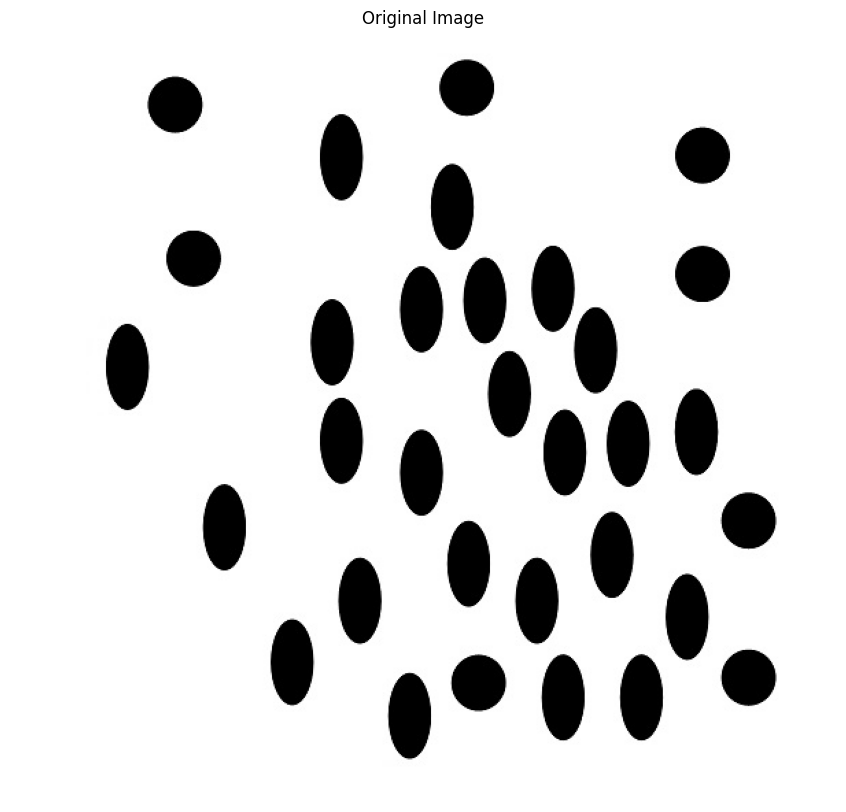

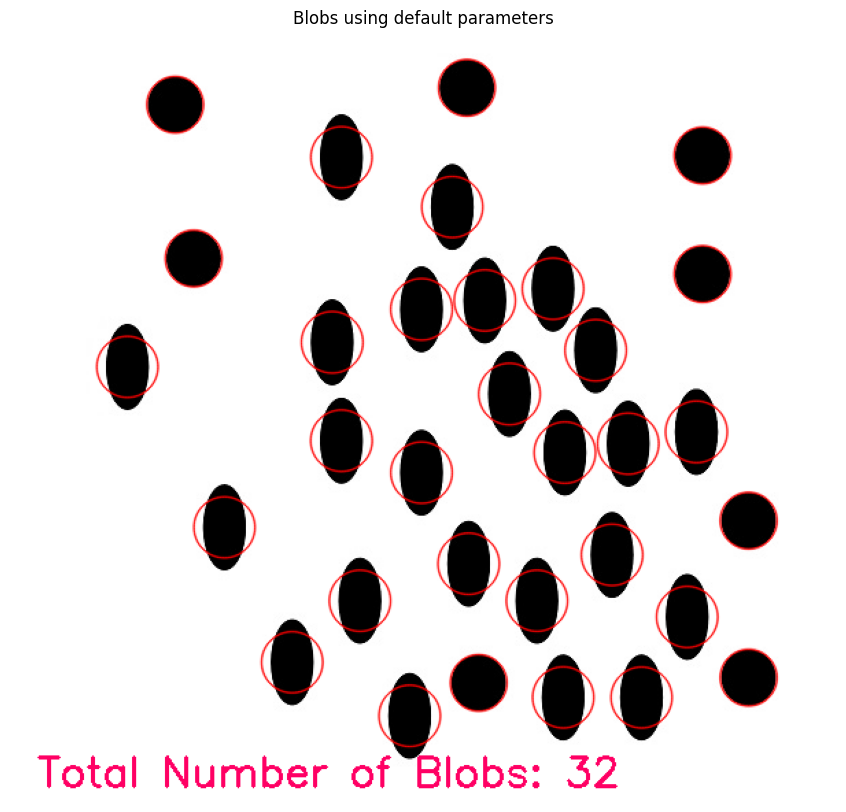

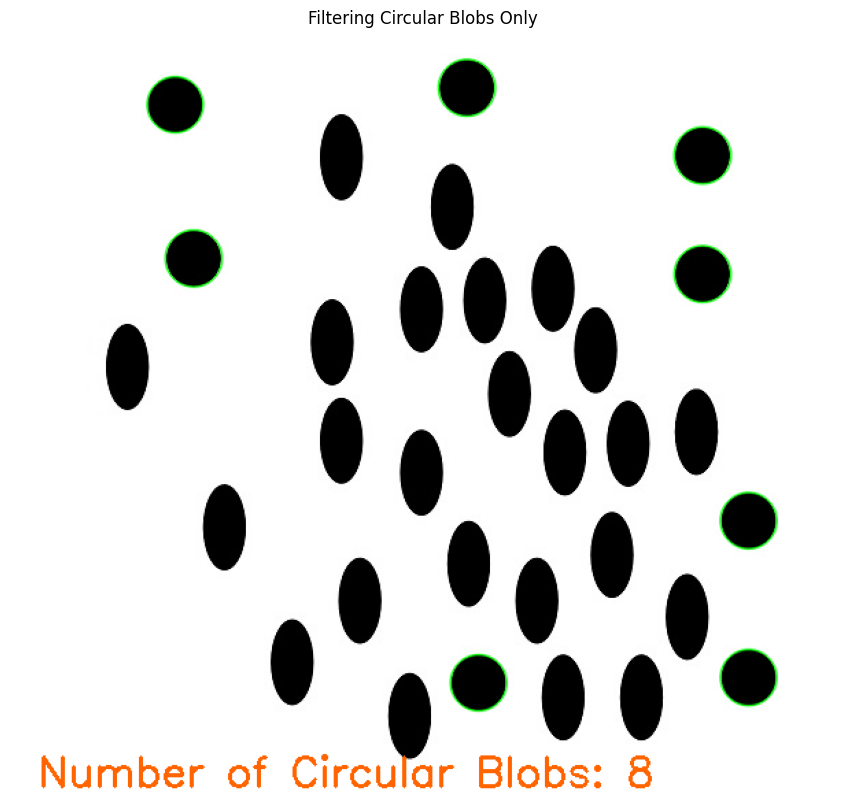

In [ ]:
image = cv2.imread("images/blobs.jpg", 0)
imshow('Original Image',image)

detector = cv2.SimpleBlobDetector.create()
 
keypoints = detector.detect(image)
 
blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector.Params()

# Set Threshold filtering parameters
params.minThreshold = 10
params.maxThreshold = 200

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector.create(params)
    
# Detect blobs
keypoints = detector.detect(image)

blank = np.zeros((1,1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(number_of_blobs)
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)


# **Finding Waldo Using Template Matching**

#### **Notes on Template Matching**

There are a variety of methods to perform template matching, but in this case we are using the correlation coefficient which is specified by the flag **cv2.TM_CCOEFF.**

So what exactly is the cv2.matchTemplate function doing?
Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is. 

Regions with sufficiently high correlation can be considered “matches” for our waldo template.
From there, all we need is a call to cv2.minMaxLoc on Line 22 to find where our “good” matches are.
That’s really all there is to template matching!

http://docs.opencv.org/2.4/modules/imgproc/doc/object_detection.html      

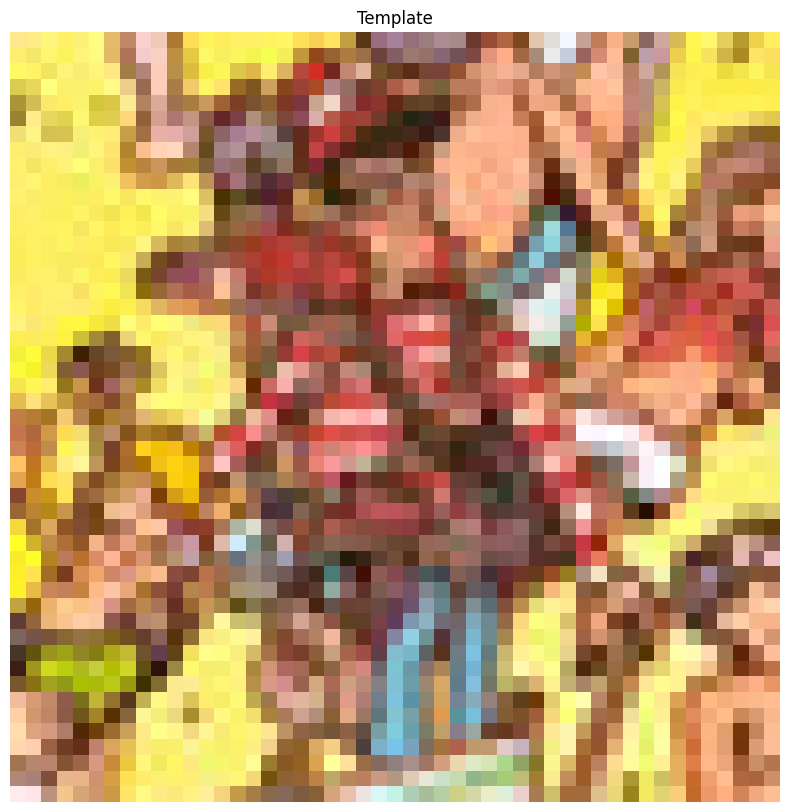

In [ ]:
template = cv2.imread('./images/waldo.jpg')
imshow('Template', template)

In [17]:
image = cv2.imread('./images/WaldoBeach.jpg')
imshow('Where is Waldo?', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

template = cv2.imread('./images/waldo.jpg',0)
flags = [cv2.TM_CCOEFF, cv2.TM_SQDIFF, cv2.TM_CCORR]
flag_names = ['cv2.TM_CCOEFF', 'cv2.TM_SQDIFF', 'cv2.TM_CCORR']

for i, flag in enumerate(flags):
  copy_img = image.copy()
  result = cv2.matchTemplate(gray, template, flag)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
  top_left = max_loc
  bottom_right = (top_left[0] + 50, top_left[1] + 50)
  cv2.rectangle(copy_img, top_left, bottom_right, (0,0,255), 5)
  
  imshow('Where is Waldo? using {}'.format(flag_names[i]), copy_img)





Output hidden; open in https://colab.research.google.com to view.